In [683]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import numpy as np
import torch.optim
import matplotlib.pyplot as plt

In [684]:
mesh = torch.linspace(-2,2,5000)
cosine_mesh = torch.cos(2*np.pi*mesh)
dataset = torch.stack((mesh,cosine_mesh))
nb_train = int(dataset.shape[1] * 0.8)
data_train = dataset[:,:nb_train]
data_test = dataset[:,nb_train:]


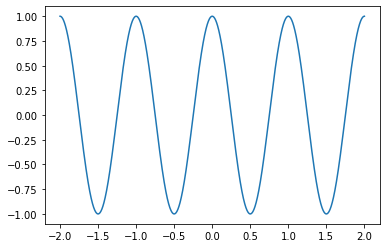

In [685]:
plt.plot(mesh,square)
plt.show()

In [686]:
class Square(Dataset):
    def __init__(self,dataset):
        super().__init__()

        self.dataset = dataset

    def __getitem__(self,idx):
        return self.dataset[0,idx], self.dataset[1,idx]


    def __len__(self):

        return self.dataset.shape[1]   


In [687]:
class Neural_Net(nn.Module):
    def __init__(self,nb_layers,input_dim,latent_dim,output_dim,activation):
        super().__init__()

        self.nb_layers = nb_layers
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.output_dim = output_dim
        self.activation = activation
        self.layers = nn.ModuleList([nn.Linear(input_dim,latent_dim)])
        for i in range(self.nb_layers-1):
            self.layers.append(nn.Linear(latent_dim,latent_dim))

        self.last_layer = nn.Linear(latent_dim,output_dim)    

    def forward(self,x):

        inputs = [x]
        for j in range(self.nb_layers):
            a = self.layers[j](inputs[j])
            """do not forget ACTIVATION FUNCTION!!!!!"""
            if j%2 == 0:
                b = self.activation[0](a)
            else:
                b = self.activation[1](a)    
            inputs.append(b)
        
        output = self.last_layer(inputs[-1])
        return output      


In [688]:
SQ_train = Square(dataset=data_train)
SQ_test = Square(dataset=data_test)
BATCH_SIZE = 25
N_EPOCHS = 500
LR = 1e-3
INPUT_DIM = 1
LATENT_DIM = 3
OUTPUT_DIM = 1
activation = [torch.cos,nn.ReLU()]
NB_LAYERS = 2
EVERY_EP = 5

In [689]:
NN = Neural_Net(nb_layers=NB_LAYERS,input_dim=INPUT_DIM,latent_dim=LATENT_DIM,output_dim=OUTPUT_DIM,activation=activation)

In [690]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(NN.parameters(),lr=LR)

In [691]:
train_loader = DataLoader(dataset=SQ_train,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
test_loader = DataLoader(dataset=SQ_test,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)

In [692]:
loss_train = 0
for epoch in range(N_EPOCHS):
    for n_batch,batch in enumerate(train_loader):
        x,labels = batch
        outputs = NN(x.view(BATCH_SIZE,INPUT_DIM))
        loss = criterion(outputs,labels.view(BATCH_SIZE,INPUT_DIM))
        loss_train += loss.detach()
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    loss_train /= (len(train_loader.dataset))
    loss_train *= BATCH_SIZE
    if epoch%EVERY_EP == 0:
        print(f"Epoch: {epoch} , Loss Train: {loss_train}")  
    
    loss_test = 0
    with torch.no_grad():
        for n_batch,batch in enumerate(test_loader):
            a,l =  batch 

            out = NN(a.view(BATCH_SIZE,INPUT_DIM))
            Loss = criterion(out,l.view(BATCH_SIZE,INPUT_DIM))
            loss_test += Loss.detach()
        loss_test /= (len(test_loader.dataset)) 
        loss_test *= BATCH_SIZE       
        
        if epoch%EVERY_EP == 0:
            print(f"Epoch: {epoch} , Loss Test: {loss_test}")        






Epoch: 0 , Loss Train: 0.5919317007064819
Epoch: 0 , Loss Test: 0.4886742830276489
Epoch: 5 , Loss Train: 0.4907560646533966
Epoch: 5 , Loss Test: 0.7643200755119324
Epoch: 10 , Loss Train: 0.4869365990161896
Epoch: 10 , Loss Test: 0.8815147876739502
Epoch: 15 , Loss Train: 0.48630577325820923
Epoch: 15 , Loss Test: 0.935103178024292
Epoch: 20 , Loss Train: 0.485863596200943
Epoch: 20 , Loss Test: 0.9575124979019165
Epoch: 25 , Loss Train: 0.4856097102165222
Epoch: 25 , Loss Test: 0.9354410767555237
Epoch: 30 , Loss Train: 0.4851405620574951
Epoch: 30 , Loss Test: 1.005107045173645
Epoch: 35 , Loss Train: 0.4854443371295929
Epoch: 35 , Loss Test: 0.9901405572891235
Epoch: 40 , Loss Train: 0.4849644899368286
Epoch: 40 , Loss Test: 1.0229535102844238
Epoch: 45 , Loss Train: 0.4850882589817047
Epoch: 45 , Loss Test: 1.0524942874908447
Epoch: 50 , Loss Train: 0.4846239387989044
Epoch: 50 , Loss Test: 1.0094707012176514
Epoch: 55 , Loss Train: 0.4843471944332123
Epoch: 55 , Loss Test: 0.997

KeyboardInterrupt: 

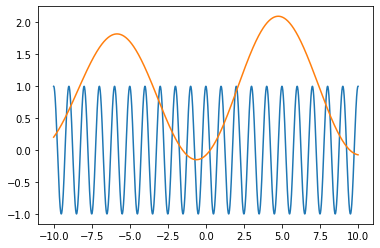

In [693]:
import matplotlib.pyplot as plt

grid = torch.linspace(-10,10,5000).view(5000,1)
cos_grid = torch.cos(2*np.pi*grid)
y_prediction = NN(grid).detach()

plt.plot(grid,cos_grid)
plt.plot(grid,y_prediction)
plt.show()

In [694]:
for i in NN.parameters():
    print(i)

Parameter containing:
tensor([[-0.5041],
        [ 0.6294],
        [-0.0478]], requires_grad=True)
Parameter containing:
tensor([-0.6096,  0.2149,  0.2356], requires_grad=True)
Parameter containing:
tensor([[-0.2249,  0.4770, -0.1507],
        [-0.3671, -0.5901,  0.7479],
        [-0.0816,  0.2558,  0.1390]], requires_grad=True)
Parameter containing:
tensor([-0.5725,  0.2138, -0.5001], requires_grad=True)
Parameter containing:
tensor([[-0.3063,  1.1766,  0.4925]], requires_grad=True)
Parameter containing:
tensor([-0.1543], requires_grad=True)
